##**I am using maximum parameters(13,939) under given limit in vanilla network and testing model validation accuracy.Model achieved validation accuracy 98.86 %.**



# **Import Libraries and modules**

In [1]:
# https://keras.io/
!pip install -q keras
# Importing Keras library
import keras

Using TensorFlow backend.


In [0]:
# Import numpy which is fundamental package for scientific computing in python
import numpy as np
# Using sequential model from models available in keras
from keras.models import Sequential
# Importing keras layers
from keras.layers import Dense, Dropout, Activation, Flatten, Add
from keras.layers import Convolution2D, MaxPooling2D
# Importing utilities which transform data
from keras.utils import np_utils
# Importing mnist from dataset for image processing
from keras.datasets import mnist

### Load pre-shuffled MNIST data into train and test sets

In [0]:
# Loading train and test data 
(X_train, y_train), (X_test, y_test) = mnist.load_data()

(60000, 28, 28)


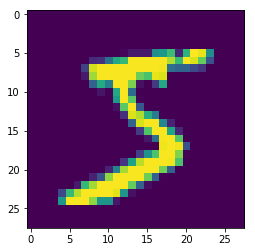

In [4]:
# Printing train data shape
print (X_train.shape)
# Matplotlib is used for ploting graph
from matplotlib import pyplot as plt
# Ploting image under code cell
%matplotlib inline
# Ploted image of train[0] from train data set
plt.imshow(X_train[0])

In [0]:
# Reshaping for train and test data for processing
X_train = X_train.reshape(X_train.shape[0], 28, 28,1)
X_test = X_test.reshape(X_test.shape[0], 28, 28,1)

In [0]:
# Conversion of train and test data set
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

In [7]:
# output of train data array and its data type
y_train[:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

In [0]:
# Convert 1-dimensional class arrays to 10-dimensional class matrices
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)

In [9]:
# Output of train data set array of dimension 10
Y_train[:10]


array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

In [17]:
# Using Activation function from keras layers
from keras.layers import Activation
# Defining sequential model
model = Sequential()
# Using convolution and Max Pooling operation on input image

model.add(Convolution2D(13, 3, 3, activation='relu', input_shape=(28,28,1))) # 26 
model.add(Convolution2D(13, 3, 3, activation='relu')) # 24
model.add(Convolution2D(26, 3, 3, activation='relu')) # 22

model.add(MaxPooling2D(pool_size=(2, 2))) # 11

model.add(Convolution2D(13, 1, 1, activation='relu')) # 11
model.add(Convolution2D(13, 3, 3, activation='relu')) # 9

model.add(Convolution2D(13, 3, 3, activation='relu')) # 7
model.add(Convolution2D(13, 3, 3, activation='relu')) # 5
model.add(Convolution2D(26, 3, 3, activation='relu')) # 3

model.add(Convolution2D(10, 1)) # 3
model.add(Convolution2D(10, 3)) # 1

# using flatten to convert multidimension array into 1-d array
model.add(Flatten())
# Using softmax activation function for probability distribution
model.add(Activation('softmax'))
# Print Model summary 
model.summary()


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_50 (Conv2D)           (None, 26, 26, 13)        130       
_________________________________________________________________
conv2d_51 (Conv2D)           (None, 24, 24, 13)        1534      
_________________________________________________________________
conv2d_52 (Conv2D)           (None, 22, 22, 26)        3068      
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 11, 11, 26)        0         
_________________________________________________________________
conv2d_53 (Conv2D)           (None, 11, 11, 13)        351       
_________________________________________________________________
conv2d_54 (Conv2D)           (None, 9, 9, 13)          1534      
_________________________________________________________________
conv2d_55 (Conv2D)           (None, 7, 7, 13)          1534      
__________

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(13, (3, 3), activation="relu", input_shape=(28, 28, 1...)`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(13, (3, 3), activation="relu")`
  import sys
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(26, (3, 3), activation="relu")`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(13, (1, 1), activation="relu")`
  if sys.path[0] == '':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:13: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(13, (3, 3), activation="relu")`
  del sys.path[0]
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:15: UserWarning: Update your `Conv

In [0]:
# Compile model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [19]:
# fit model for training data
model.fit(X_train, Y_train, batch_size=32, epochs=10, verbose=1, validation_data=(X_test, Y_test))



Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 24s 404us/step - loss: 0.2718 - acc: 0.9150 - val_loss: 0.1015 - val_acc: 0.9680
Epoch 2/10
60000/60000 [==============================] - 23s 388us/step - loss: 0.0952 - acc: 0.9716 - val_loss: 0.0615 - val_acc: 0.9814
Epoch 3/10
60000/60000 [==============================] - 23s 390us/step - loss: 0.0722 - acc: 0.9785 - val_loss: 0.0428 - val_acc: 0.9862
Epoch 4/10
60000/60000 [==============================] - 23s 388us/step - loss: 0.0588 - acc: 0.9816 - val_loss: 0.0418 - val_acc: 0.9868
Epoch 5/10
60000/60000 [==============================] - 23s 387us/step - loss: 0.0524 - acc: 0.9835 - val_loss: 0.0406 - val_acc: 0.9870
Epoch 6/10
60000/60000 [==============================] - 23s 386us/step - loss: 0.0468 - acc: 0.9857 - val_loss: 0.0371 - val_acc: 0.9872
Epoch 7/10
60000/60000 [==============================] - 23s 388us/step - loss: 0.0419 - acc: 0.9869 - val_loss: 0.

In [20]:
# evaluating and printing model score
score = model.evaluate(X_test, Y_test, verbose=0)
print('Loss:', score[0])
print('Accuracy:', score[1])

Loss: 0.038102811605017634
Accuracy: 0.9886
